In [4]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Adjust file path as needed
file_path = r'cifar-100-python\train'  # Or use os.path.join
datadict = unpickle(file_path)

X = datadict[b'data']
Y = datadict[b'fine_labels']

In [5]:
datadict.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

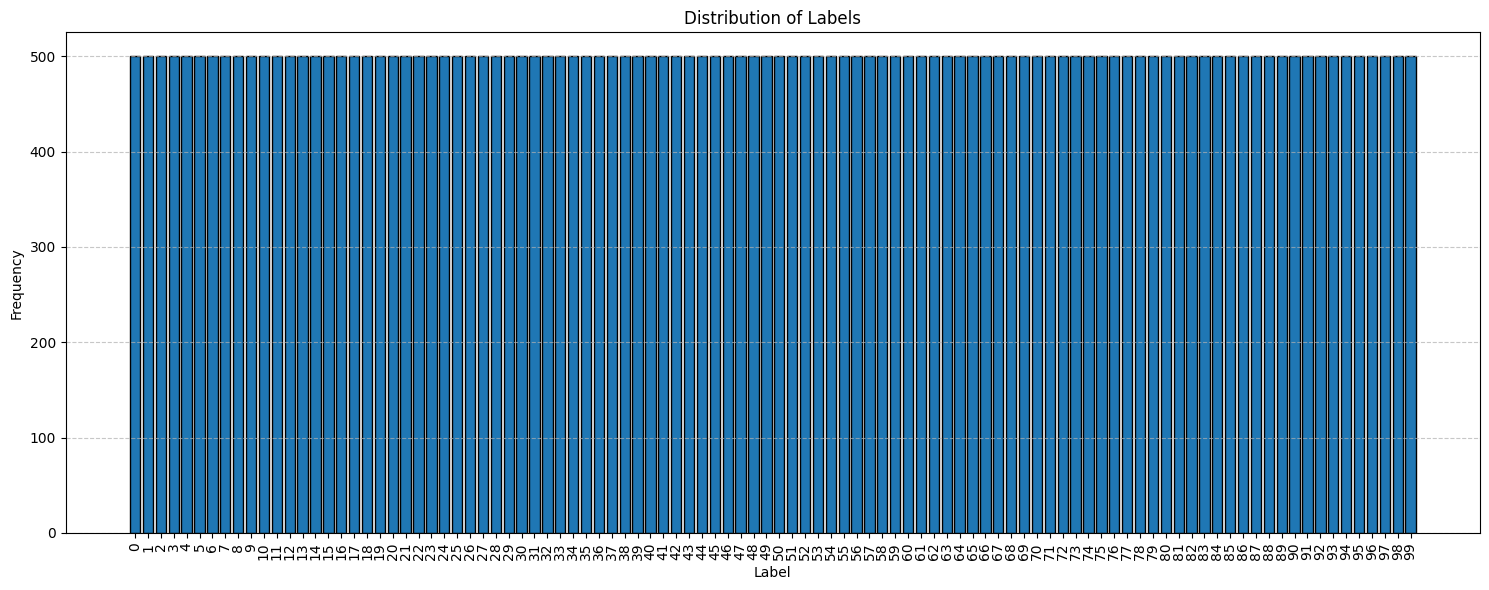

In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load data
file_path = r'cifar-100-python\train'  # Or use os.path.join
datadict = unpickle(file_path)

# Extract data and labels
X = datadict[b'data']
Y = datadict[b'fine_labels']

# Convert labels to numpy array for convenience
Y = np.array(Y)

# Plot histogram of labels
plt.figure(figsize=(15, 6))  # Increase figure size
plt.hist(Y, bins=np.arange(101) - 0.5, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Rotate x-axis labels to avoid crowding
plt.xticks(ticks=np.arange(0, 100, 1), labels=np.arange(100), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

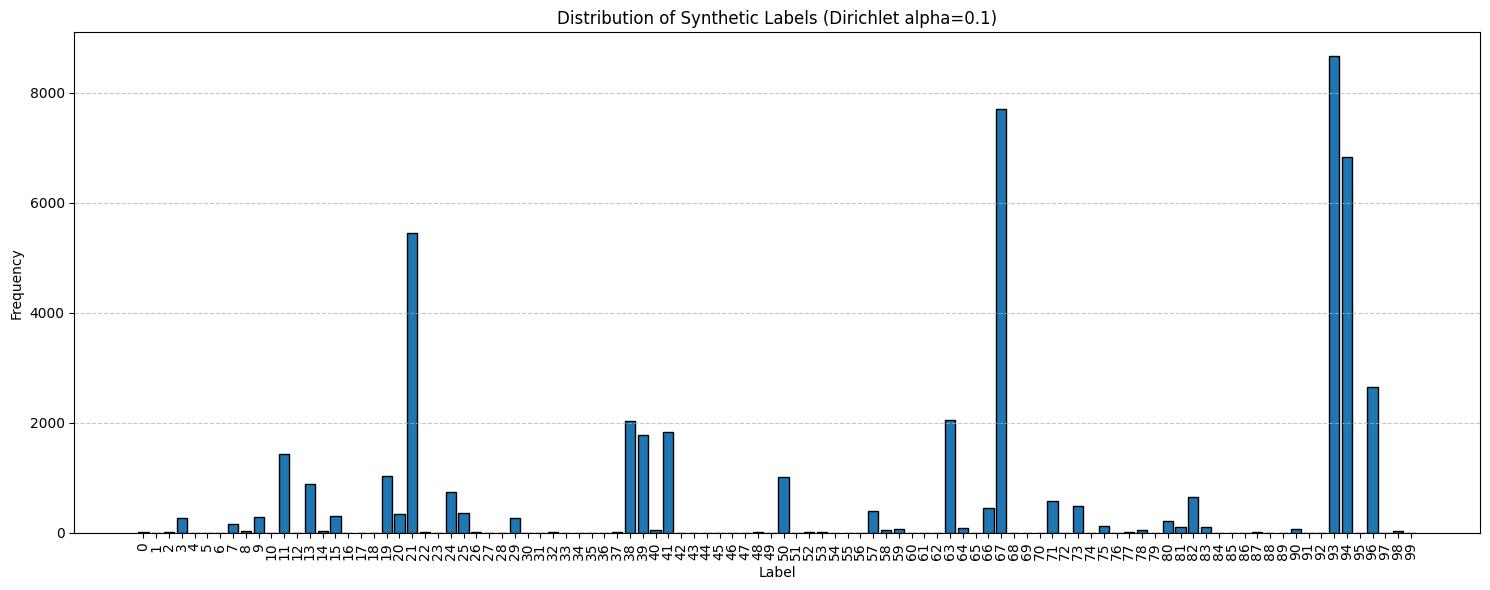

In [27]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Load CIFAR-100 data
file_path = r'cifar-100-python\train'  # Adjust this path as necessary
datadict = unpickle(file_path)

# Extract labels
Y = datadict[b'fine_labels']
Y = np.array(Y)

# Number of samples in CIFAR-100 training set
num_samples = len(Y)

# Parameters for Dirichlet distribution
alpha = 0.1
num_categories = 100  # Number of CIFAR-100 labels

# Generate Dirichlet distribution samples
dirichlet_proportions = np.random.dirichlet([alpha] * num_categories, size=1)[0]

# Create synthetic label distribution based on Dirichlet proportions
synthetic_labels = np.random.choice(
    num_categories, 
    size=num_samples, 
    p=dirichlet_proportions
)

# Plot histogram of synthetic Dirichlet-based labels
plt.figure(figsize=(15, 6))
plt.hist(synthetic_labels, bins=np.arange(num_categories + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.title(f'Distribution of Synthetic Labels (Dirichlet alpha={alpha})')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Set x-axis ticks to show all labels from 0 to 99
plt.xticks(ticks=np.arange(num_categories), labels=np.arange(num_categories), rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()